<a href="https://colab.research.google.com/github/smdr111/Regression_roadmap/blob/main/SimpleLinearRegression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.corrwith(df['Sales'])

,0
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


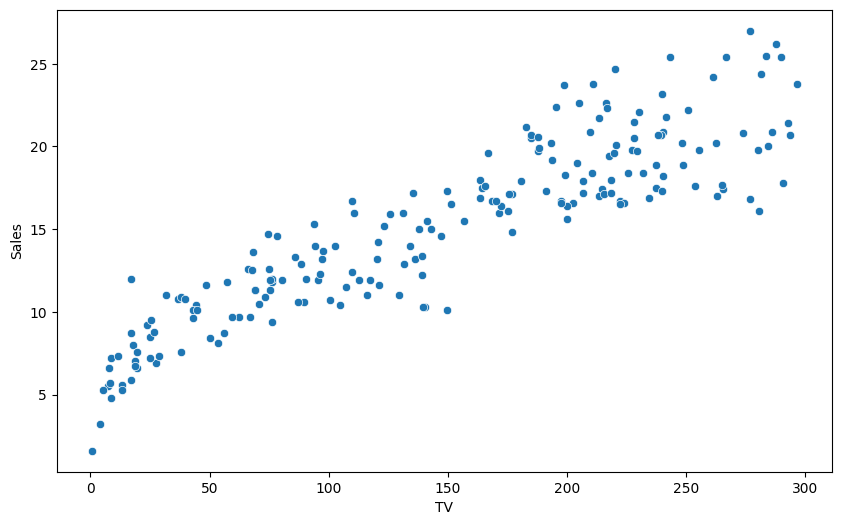

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='TV',y='Sales')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
train_set,test_set = train_test_split(df,test_size=0.1,random_state=42)

In [10]:
X_train = np.asanyarray(train_set[['TV']])
Y_train = np.asanyarray(train_set[['Sales']])

In [11]:
LR_Model = LinearRegression()
LR_Model.fit(X_train,Y_train)

LinearRegression()

In [12]:
X_test = np.asanyarray(test_set[['TV']])
Y_test = np.asanyarray(test_set[['Sales']])

In [13]:
y_pred = LR_Model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(Y_test,y_pred)
print(f'MAE = {MAE}')

MAE = 2.037955356968121


In [16]:
from sklearn.metrics import root_mean_squared_error

RMSE = root_mean_squared_error(Y_test,y_pred)
print(f'MSE = {RMSE}')

MSE = 2.5103822386472214


In [18]:
test = df.sample(10)

In [19]:
real_sales = df.loc[test.index]['Sales']

In [20]:
test_arr = np.asanyarray(test[['TV']])
test_pred = LR_Model.predict(test_arr)

In [32]:
pd.DataFrame(test_pred)

,0
0,12.028906
1,19.306414
2,18.810220
3,17.580762
4,9.222655
5,19.091396
6,14.272804
7,7.474951
8,12.811790
9,20.453172


In [23]:
real_sales

,Sales
107,12.0
174,16.5
74,17.0
187,17.3
190,10.8
181,17.2
64,16.0
126,6.6
143,10.4
147,25.4
